## Dimensionality Reduction
**Dimension Reduction**은 ML, DL 두 분야 모두에서 중요하게 생각되는 이론이다. Dimension Reduction을 하는 이유를 크게 2가지로 생각하면 다음과 같다.
1. 수 많은 Feature중 에서 의미있는 Feature를 선택하기 위하여 => Feature Selection or Feature Extraction
2. High Dimension의 결과를 Visualization하기 위하여

주로 위의 2가지 이유때문에 많이 사용된다.   

**Dimension Reduction은 많은 종류가 존재하지만, 공통적인 Goal은 같다. "공통적인 Goal은 High Dimension의 Informaion을 유지한 채 Low Dimension으로서 표현하고 싶다."** 이다.
- Feature Selection: High Dimension에서 의미있는 Feature만 Selection하여 Low Dimension으로서 표현한다.
- Feature Extraction: High Dimension에 있는 Feature를 잘 표현하게 조합하여 Low Dimension으로서 표현한다.

이번 Dimensionality Reduction에서는 Feature Extraction을 중점적으로 살펴보며 대표적인 예로서는 PCA을 살펴보도록 한다.

이전 Post의 Theory에 관한 Post: <a href="https://wjddyd66.github.io/others/PCA/">PCA</a>

**참고 사항**  
- <a href="https://wjddyd66.github.io/machine%20learning/Theory(11)ICA/">ICA</a>
- <a href="https://wjddyd66.github.io/machine%20learning/Theory(12)CDMF/">Matrix Factorization</a>

위의 2개의 Post도 어찌 생각하면 Dimensionality Reduction에 사용할 수 있어서 남겨두었습니다.

ICA의 경우에는 Observation Data을 Independent Source로서 나누게 된다면, 특정 Independent Source를 제거하여 의미 없는 Information을 줄일 수 있습니다.

Matrix Factorization의 경우에는 Recommendation System에서 많이 사용하지만, 서로 다른 두개의 Modality의 공통적인 Feature를 Low Dimension으로서 표현한다고 생각할 수 있습니다.

## Setup
실제 Project를 진행하기 앞서 사용하고자 하는 Library확인 및 원하는 Version(Python 언어 특성상 Version에 많이 의존하게 된다.)이 설치되어있는지 확인하는 작업이다.  
또한, 자주 사용하게 될 Function이나, Directory를 지정하기도 한다.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Curse of Dimensionality
Data가 High Dimension이라 생각하면 다음과 같은 단점이 생기게 된다.

- 데이터 간의 거리 증가
  - Ex) n 차원 상의 점 <span>$p(p_1, ..., p_n), q(q_1, ..., q_n)$</span>의 거리: <span>$d(p,q) = \sqrt{\sum_{i=1}^n(p_i-q_i)^2}$</span>
  - 데이터 간의 평균 거리(avg distance, euclidean distance)를 유지하려면, 기하급수적으로 많은 데이터 필요(<span>$\text{dim}^n$</span>)
- Hard to find pattern -> cannot train similar features
- Lots of Params, but almost useless -> likely to overfit to noise

위와 같이 Data의 Dimension이 증가하면 단점이 생기게 된다. 이것을 해결하기 위하여, 의미 있는 Feature를 선택(Feature Selection)하거나 Feature의 특징을 살리게 추출(Feature Extraction)을 진행하게 된다.

## PCA
<p>$$C = P \sum P^T \text{ (P: Orthogonal, }\sum\text{: Diagonal)}$$</p>

- Orthogonal: Rotation
- Diagonal: Scaling

<a href="https://wjddyd66.github.io/others/PCA/">PCA</a>를 보면 위와 같이 나타낼 수 있다. 즉, Rotation과 Scaling으로서 표현 가능하다는 것 이다.

이러한 Scaling은 Eigen Vector로서 Eigen Value를 가지게 되고 Eigen Value가 크다는 것은 그 축으로 많은 Information을 가지고 있다는 것을 의미한다.

따라서, 이러한 큰 축에 대하여 Projection하여 Feature Extraction을 실시하게 된다.

아래 Code는 Dataset의 축에 따라서 Projection한 Eigen Value값을 확인한다.

Saving figure pca_best_projection_plot


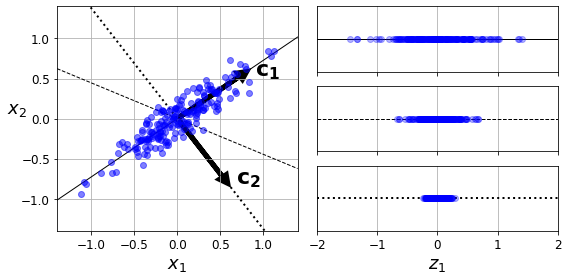

In [2]:
angle = np.pi / 5
stretch = 5
m = 200

np.random.seed(3)
X = np.random.randn(m, 2) / 10
X = X.dot(np.array([[stretch, 0],[0, 1]])) # stretch
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]) # rotate

u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi/6), np.sin(angle - 2 * np.pi/6)])
u3 = np.array([np.cos(angle - np.pi/2), np.sin(angle - np.pi/2)])

X_proj1 = X.dot(u1.reshape(-1, 1))
X_proj2 = X.dot(u2.reshape(-1, 1))
X_proj3 = X.dot(u3.reshape(-1, 1))

plt.figure(figsize=(8,4))
plt.subplot2grid((3,2), (0, 0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4*u1[1]/u1[0], 1.4*u1[1]/u1[0]], "k-", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u2[1]/u2[0], 1.4*u2[1]/u2[0]], "k--", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u3[1]/u3[0], 1.4*u3[1]/u3[0]], "k:", linewidth=2)
plt.plot(X[:, 0], X[:, 1], "bo", alpha=0.5)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{c_1}$", fontsize=22)
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_2}$", fontsize=22)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot2grid((3,2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=1)
plt.plot(X_proj1[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (1, 1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=1)
plt.plot(X_proj2[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (2, 1))
plt.plot([-2, 2], [0, 0], "k:", linewidth=2)
plt.plot(X_proj3[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

save_fig("pca_best_projection_plot")
plt.show()

**PCA applied to MNIST Dataset**  
Mnist Dataset은 Image로서 28 * 28 = 784의 Dimension을 가지는 Data이다. 이것을 PCA로서 Eigen Value>0.95로서 Filtering을 하게 되면, 154의 Dimension으로서 낮출 수 있다.

In [4]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# MNIST Dataset
mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

# Split Dataset & Label
X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

# PCA Model
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print('Reduction Dimension: ',len(cumsum),' -> ',d)

Reduction Dimension:  784  ->  154


그렇다면 PCA를 사용하여 얼만큼의 Dimension을 남겨야 되는가에 대해서는 사용자가 선택해야 한다.  

sklearn에서는 몇개의 Dimension을 선택하였을 때 분산을 몇 %유지하는지 알 수 있다.

**Percentage of variance according to dimension**

Saving figure explained_variance_plot


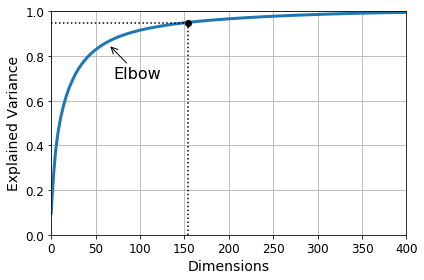

In [5]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
save_fig("explained_variance_plot")
plt.show()

**Dimension maintaining variance of 95%**

In [6]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

print("Variance: ",np.sum(pca.explained_variance_ratio_))
print("Component: ",pca.n_components_)

Variance:  0.9503207480330471
Component:  154


**Recovery**  
분산으로 Dimension이 축소된 Data를 다시 복원하였을 때 Information을 많이 가지고 있는지 확인하기 위하여 Visualization을 실시하게 된다.

Saving figure mnist_compression_plot


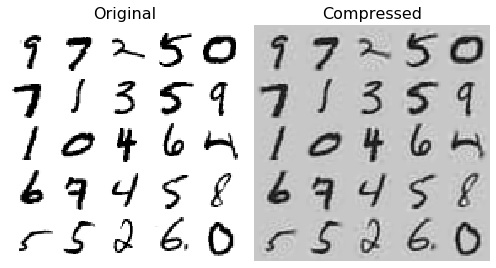

In [13]:
# PCA => Num of Component: 154, Percentage of Maintaining Variance: 95%
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

# Visualization
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
    
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

save_fig("mnist_compression_plot")

## IPCA(Incremental PCA)
PCA의 단점은 Normal Equation으로서 Solution을 구하기 때문에, 모든 Data를 올려야 된다는 단점이 있다. 즉, Memory를 많이 잡아먹게 되는 단점이 생기게 된다.(현재 Local에서는 돌아가지 않았습니다.)

IPCA는 SVD알고리즘의 Data를 Batch 단위로서 올려서 구할 수 있는 방법이기 때문에, Memory의 문제를 해결할 수 있는 방법이다.

또한, 실시간으로 Update가 가능하다는 장점을 가지고 있다.

**참조**  
<a href="https://home.cse.ust.hk/~jamesk/papers/tsmc06.pdf">A Novel Incremental Principal Component Analysis and Its Application for Face Recognition</a>는 IPCA와 IPCA + KPCA에 대해서도 설명이 되어있는 논문이다.  
수식이 많기 때문에 이번 Post에서는 다루지 않고, 나중에 따로 공부하도록 한다.

**Sklearn IPCA**

....................................................................................................
Mean comparison of PCA and IPCA:  True
Comparison of all PCA and IPCA value:  False


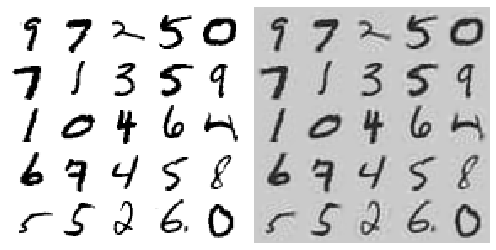

In [14]:
from sklearn.decomposition import IncrementalPCA

X_reduced_pca = X_reduced

# Batch Size => Data Size
n_batches = 100

# IPCA
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    print(".", end="") # not shown in the book
    inc_pca.partial_fit(X_batch)

# Result
X_reduced = inc_pca.transform(X_train)
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

# Visualization
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.tight_layout()

X_reduced_inc_pca = X_reduced

# PCA vs IPCA
print('\nMean comparison of PCA and IPCA: ',np.allclose(pca.mean_, inc_pca.mean_))
print('Comparison of all PCA and IPCA value: ',np.allclose(X_reduced_pca, X_reduced_inc_pca))

## Kernel PCA
<a href="https://wjddyd66.github.io/machine%20learning/Theory(5)SVM(2)/#57-kernel">SVM</a>에서 Kernel Trick에 대해서 배웠습니다.

<p>$$K(x_i,x_j) = \varphi(x_i) \cdot \varphi(x_j)$$</p>

- Polynomial: <span>$k(x_i,x_j) = (x_i \cdot x_j)^d$</span>
- Gaussian: <span>$k(x_i,x_j) = exp(-r||x_i - x_j||^2) (\text{단,  }r = \frac{1}{2 \sigma^2})$</span>
- Hyperbolic tangent: <span>$k(x_i,x_j) = tanh(kx_i \cdot x_j+c) (\text{단,  }k > 0, c<0 )$</span>

Kernel PCA도 위의 Kernel을 사용하여 Dataset의 Dimension을 잘 Classification하도록 늘린 뒤, Dimension을 줄이는 방법이다.  

이러한 Kernel PCA는 **비선형 Dataset에 대해서는 Classification을 잘 유지하면서 Dimension을 줄일 수 있다. 하지만 Kernel을 통하여 Dimension을 늘린 Dataset은 Inf까지 늘릴 수 있으므로, 다시 원본 Dataset으로 복원하기가 어렵다는 단점이 존재하게 된다.**

또한, 어떠한 Kernel을 사용해야 할지, 또한 Hyperparameter를 사용할지에 대해서는 <a href="">Pipeline</a>을 사용하여 Grid Search를 하게 된다.

**Memory와 시간을 많이 잡아먹어서 실행하지 못하였습니다.**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import KernelPCA

# Grid Search => Kernel PCA
clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="lbfgs"))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

# Check Best Parameter
print('Best Parameter: ', grid_search.best_params_)

# Reverse => Restore Original Data
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

# Check Loss => Difference between original data and restored data
print('Difference between original data and restored data(MSE): ',mean_squared_error(X, X_preimage))